## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
try:
    import pandas as pd
    import numpy as np
    import random
    import matplotlib.pyplot as plt
    %matplotlib inline
    #We are setting the seed to assure you get the same answers on quizzes as we set up
    random.seed(42)
except:
    print("error")

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
try:
    df = pd.read_csv('./data/ab_data.csv')
except:
    print("error")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
try:
    print(df.shape)
except:
    print("error")

(294478, 5)


>### Observations:
    1. Number of rows: 294478
    2. Number if columns: 5

c. The number of unique users in the dataset.

In [4]:
try:
    print(df.nunique())
except:
    print("error")

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64


d. The proportion of users converted.

In [5]:
try:
    """
        length of number proportion of users coverted 
            divided by 
        the lenghth of total numbers of users 
    """
    u_converted = len(df.query('converted==1'))
    print(u_converted)

    users = len(df.index)
    print(users)

    proportion_of_users = len(df.query('converted==1'))/len(df.index) 
    print(proportion_of_users)
except:
    print("error")

35237
294478
0.11965919355605512


>### Observations:
    1. number proportion of users coverted : 35237
    2. total numbers of users : 294478
    3. The proportion of users converted : 0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
try:
    """
        Both new_page and treatment don't line up togeather only when:
        1. landing_page is equal to new_page and group is not equal to treatment
        2. landing_page is not equal to new_page and group is equal to treatment
    """
    n1 = len(df.query('landing_page=="new_page" and group!="treatment"'))
    print(n1)

    n2 = len(df.query('landing_page!="new_page" and group=="treatment"'))
    print(n1)

    n = n1+n2
    print(n)
except:
    print("error")

1928
1928
3893


>### Observations:
    1. number of times the new_page and treatment don't line up : 3893

f. Do any of the rows have missing values?

In [7]:
# checking for missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

>### Observations:
    1. There is no missing values in the dataset.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.copy()
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
try:
    df2 = df[((df.group=='treatment') & \
          (df.landing_page=='new_page')) | \
         ((df.group=='control') &\
          (df.landing_page=='old_page'))]
except:
    print("error")

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
values = df2['user_id'].nunique()
print("no of uniqiue user_ids : {}".format(values))

no of uniqiue user_ids : 290584


>### Observations:
    1. no of uniqiue user_ids : 290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
duplicate = df2.user_id[df2.user_id.duplicated()]
print("no of repeated user_ids : {}".format(duplicate))

no of repeated user_ids : 2893    773192
Name: user_id, dtype: int64


>### Observations:
    1. no of repeated user_ids : 1
    2. duplicate entry present at index : 2893
    3. user_id of duplicate entry : 773192

c. What is the row information for the repeat **user_id**? 

In [13]:
information = df2.query('user_id.index == "2893"')
print(information)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


>### Observations:
    the row information for the repeat user_id:
           user_id           timestamp           group     landing_page  converted
    2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(inplace=True)

/home/kpiyush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
#Rechecking is there any duplicated values left or not
df2.duplicated().sum()

0

>### Observation:
    1. There is no duplicate value left in df2 dataset.

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
mean = df.converted.mean()
print(mean)

0.11965919355605512


>### Observation:
    1. probability of an individual converting of the page they receive : 0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
probability = len(df2.query('group=="control" and converted==1'))/len(df2.query('group=="control"'))
print(probability)

0.1203863045004612


>### Observation:
    1. an individual was in the control group, probability they converted : 0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
probability = len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="control"'))
print(probability)

0.1188375070556328


>### Observation:
    1. an individual was in the treatment group, the probability they converted : 0.1188375070556328

d. What is the probability that an individual received the new page?

In [19]:
probability = len(df2.query('landing_page=="new_page"'))/len(df2.landing_page.index)
print(probability)

0.5000636646764286


>### Observation:
    1. probability that an individual received the new page : 0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

> ### Observations:
    1. The control group (the group with the old page) converted at a larger rate than the treatment (the group with the new page). However, the significance of this variation is very small with a variation of approximately 0.2%.
    2. The probability that an individual received a new page is approximately 0.5, this means that it is not possible for there to be a variation in reformation based on being given more possibilities to do so.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> H_1: p_new &gt; p_old 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = len(df2.query('converted==1'))/len(df2.index)
print(p_new)

0.11959667567149027


>### Obseravtions
    1. the convert rate for 𝑝_𝑛𝑒𝑤 under the null is : 0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = len(df2.query('converted==1'))/len(df2.index)
print(p_old)

0.11959667567149027


>### Obseravtions
    1. the convert rate for 𝑝_𝑛𝑒𝑤 under the null is : 0.11959667567149027

c. What is $n_{new}$?

In [22]:
#calculate number of queries when landing_page is equal to new_page
n_new = len(df2.query('landing_page=="new_page"'))
print(n_new)

145311


>### Obseravtions
    1. value of 𝑛_𝑛𝑒𝑤 : 0.11959667567149027

d. What is $n_{old}$?

In [23]:
#calculate number of queries when landing_page is equal to old_page
n_old = len(df2.query('landing_page=="old_page"'))
print(n_old)

145274


>### Obseravtions
    1. value of 𝑛_odd : 145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
## simulate n_old transactions with a convert rate of p_new under the null
new_page_converted = np.random.choice([0, 1], n_new, p = [p_new, 1-p_new])
print(new_page_converted)

[1 1 1 ... 0 1 1]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
## simulate n_old transactions with a convert rate of p_new under the null
old_page_converted = np.random.choice([0, 1], n_old, p = [p_old, 1-p_old])
print(old_page_converted)

[1 1 1 ... 1 1 1]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# differences computed in from p_new and p_old
obs_diff= new_page_converted.mean() - old_page_converted.mean()# differences computed in from p_new and p_old
print(obs_diff)

0.00012686013217733105


>### Observations:
    1. value of 𝑝_𝑛𝑒𝑤 - 𝑝_𝑜𝑙𝑑 is : -0.0002448091890306925

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
# Create sampling distribution for difference in p_new-p_old simulated values with boostrapping
p_diffs = []
for i in range(10000):

    # 1st parameter dictates the choices you want.  In this case [1, 0]
    p_new1 = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new])
    p_old1 = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old])
    p_new2 = p_new1.mean()
    p_old2 = p_old1.mean()
    p_diffs.append(p_new2-p_old2)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Count')

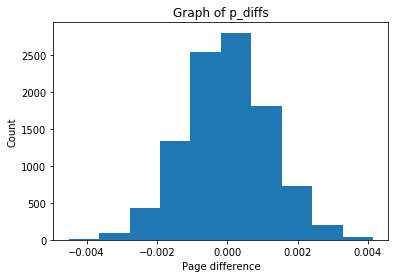

In [28]:
p_diffs=np.array(p_diffs)
#histogram of p_diff
plt.hist(p_diffs)
plt.title('Graph of p_diffs')#title of graphs
plt.xlabel('Page difference') # x-label of graphs
plt.ylabel('Count') # y-label of graphs

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

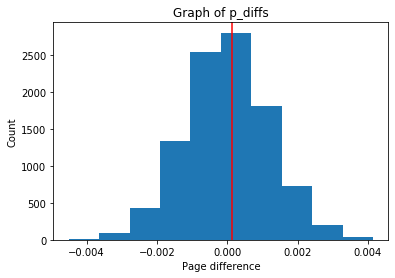

In [29]:
#histogram of p_diff
plt.hist(p_diffs);
plt.title('Graph of p_diffs') #title of graphs
plt.xlabel('Page difference') # x-label of graphs
plt.ylabel('Count') # y-label of graphs
plt.axvline(x= obs_diff, color='r');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>### Answer
    The value calculated is called p-value. For accepting null hypothesis p-value should be greater than suggested p-value. 
    We calculate that almost 90% of the population is above the real diffrence which suggested that new-page is not doing significantly better than the old page. 
    New page is worse than old page, so we should stick to the null hyposthesis as p-value is large.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = len(df2.query('converted==1 and landing_page=="old_page"')) #rows converted with old_page
convert_new = len(df2.query('converted==1 and landing_page=="new_page"')) #rows converted with new_page
n_old = len(df2.query('landing_page=="old_page"')) #rows_associated with old_page
n_new = len(df2.query('landing_page=="new_page"')) #rows associated with new_page
n_new

145311

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
#Computing z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller') 
print(z_score,p_value)

1.3116075339133115 0.905173705140591


>### Observattions:
    1. value of Z_score : 1.3116075339133115
    2. value of P_value : 0.905173705140591

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [32]:
from scipy.stats import norm

#Checking the significane of that perticualr value
print(norm.cdf(z_score)) 

0.905173705140591


>### Observations
    1. Z_score less than 95% of critical confidence. Hence we fail to reject null hypothesis.
    2. Therefore the conclusion is same as part j that we accept null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [34]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

/home/kpiyush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kpiyush/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
X = df2['converted']
Y = df2[['intercept', 'ab_page']]
model = sm.Logit(X,Y)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:               8.085e-06
Time:                        19:52:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>### Observations:
    1. p-value associated with ab_page i 0.190.It is diffrent in part 2
>**In Logistic regression** 
$$H_0: p_{new} - p_{old} = 0$$ $$H_1: p_{new} - p_{old} != 0$$ In part 2 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>### Observations:
    1. The drift appears in numerous distinct combinations of data but passes or changes when these groups are joined.
    2. Yes if we add high correlations predictor variables, leading to unpredictable and uncertain estimates of regression coefficients (Multicollinearity) can affect our model. Every time we include a new predictor variable with no change in sample size we lose a degree of freedom. The result often is that previously significant predictor in the new regression is no longer significant at the same probability of a Type 1 error.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
countries_df = pd.read_csv('./data/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [38]:
df_new.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [39]:
### Create the necessary dummy variables
df_new[['US', 'UK', 'CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA
user_id,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
models=sm.Logit(df_new['converted'],df_new[['US','UK']])
results=models.fit()
summary = results.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.595341
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:                 -0.6261
Time:                        19:52:12   Log-Likelihood:            -1.7300e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
US            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK            -1.9868      0.

<a id='conclusions'></a>
## Conclusions

>### Observations:
        From the above summart, it can be conculded that even after joing them there is no as such statistical evidence that indicates 
        an impact on the conversion since p-values were all exceeding 0.05.


Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0